In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [12]:
dataset_dir = "./Dataset/caltech-101-img/"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [13]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [14]:
weights_path = "./Dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [15]:
for layer in base_model.layers:
   layer.trainable = False

In [16]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
32/32 [==============================] - 83s 3s/step - loss: 4.0511 - accuracy: 0.1720 - val_loss: 3.4852 - val_accuracy: 0.2795
Epoch 2/10
32/32 [==============================] - 85s 3s/step - loss: 3.0677 - accuracy: 0.3460 - val_loss: 3.0146 - val_accuracy: 0.3635
Epoch 3/10
32/32 [==============================] - 85s 3s/step - loss: 2.5584 - accuracy: 0.4335 - val_loss: 2.7035 - val_accuracy: 0.4340
Epoch 4/10
32/32 [==============================] - 90s 3s/step - loss: 2.1884 - accuracy: 0.5145 - val_loss: 2.4697 - val_accuracy: 0.4870
Epoch 5/10
32/32 [==============================] - 90s 3s/step - loss: 1.8919 - accuracy: 0.5815 - val_loss: 2.3065 - val_accuracy: 0.5005
Epoch 6/10
32/32 [==============================] - 90s 3s/step - loss: 1.6653 - accuracy: 0.6335 - val_loss: 2.2004 - val_accuracy: 0.5220
Epoch 7/10
32/32 [==============================] - 92s 3s/step - loss: 1.4647 - accuracy: 0.6835 - val_loss: 2.1136 - val_accuracy: 0.5370
Epoch 8/10
32/32 [==

In [18]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 90s 3s/step - loss: 3.2663 - accuracy: 0.3310 - val_loss: 2.5289 - val_accuracy: 0.4350
Epoch 2/10
32/32 [==============================] - 92s 3s/step - loss: 1.9629 - accuracy: 0.5325 - val_loss: 1.9920 - val_accuracy: 0.5505
Epoch 3/10
32/32 [==============================] - 96s 3s/step - loss: 1.3234 - accuracy: 0.6610 - val_loss: 1.8553 - val_accuracy: 0.5770
Epoch 4/10
32/32 [==============================] - 100s 3s/step - loss: 0.8393 - accuracy: 0.7765 - val_loss: 1.7296 - val_accuracy: 0.5925
Epoch 5/10
32/32 [==============================] - 95s 3s/step - loss: 0.4998 - accuracy: 0.8645 - val_loss: 1.7162 - val_accuracy: 0.6000
Epoch 6/10
32/32 [==============================] - 95s 3s/step - loss: 0.3254 - accuracy: 0.9165 - val_loss: 1.7925 - val_accuracy: 0.6060
Epoch 7/10
32/32 [==============================] - 95s 3s/step - loss: 0.1934 - accuracy: 0.9495 - val_loss: 1.8427 - val_accuracy: 0.6205
Epoch 8/10
32/32 [=

In [19]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 42s 671ms/step


In [20]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  airplanes
Actual:  airplanes


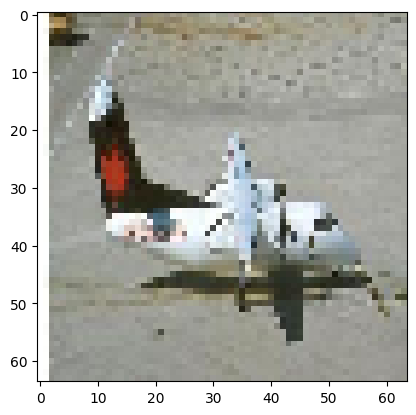

In [32]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])